# Other

## Issue from BEA Income Data:
<LI>*&nbsp;Cibola, NM was separated from Valencia in June 1981, but in these estimates, Valencia includes Cibola through the end of 1981.</LI>
<LI>*&nbsp;La Paz County, AZ was separated from Yuma County on January 1, 1983. The Yuma, AZ MSA contains the area that became La Paz County, AZ through 1982 and excludes it beginning with 1983.</LI>

<LI>*&nbsp;Broomfield County, CO, was created from parts of Adams, Boulder, Jefferson, and Weld counties effective November 15, 2001. Estimates for Broomfield county begin with 2002.</LI>


### Approach

- combine Cibola NM with Valencia for 1981-2017
- combine La Paz County AZ with Yuma for 1983-2017
- combine Broomfield County with Boulder CO all years (<2002 Boulder, >2002 Boulder+Broomfield)



In [1]:
import pandas
import geopandas
%matplotlib inline

## NM

In [2]:
csv = pandas.read_csv('35.csv')

In [3]:
csv = csv.replace('(NA)', 0)

In [4]:
cibola = csv[csv.GeoName.str.startswith('Cibola')]
valencia = csv[csv.GeoName.str.startswith('Valencia')]

In [5]:
cibola

,Unnamed: 0,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
12,5562,"""35006""","Cibola, NM*",6,CAINC1,1,...,Personal income (thousands of dollars),Thousands of dollars,0,...,612487,625209,641532,661228,669120,666997,703846,726953,733165,741683
13,5563,"""35006""","Cibola, NM*",6,CAINC1,2,...,Population (persons) 1/,Number of persons,0,...,27259,27097,27318,27470,27379,27341,27080,26976,26996,26853
14,5564,"""35006""","Cibola, NM*",6,CAINC1,3,...,Per capita personal income (dollars) 2/,Dollars,0,...,22469,23073,23484,24071,24439,24395,25991,26948,27158,27620


In [6]:
valencia

,Unnamed: 0,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
99,5649,"""35061""","Valencia, NM*",6,CAINC1,1,...,Personal income (thousands of dollars),Thousands of dollars,98031,...,2117211,2125302,2135646,2192910,2182250,2147723,2256080,2348505,2410723,2448624
100,5650,"""35061""","Valencia, NM*",6,CAINC1,2,...,Population (persons) 1/,Number of persons,40100,...,74879,75770,76789,76894,76693,76314,75750,75580,75639,75940
101,5651,"""35061""","Valencia, NM*",6,CAINC1,3,...,Per capita personal income (dollars) 2/,Dollars,2445,...,28275,28049,27812,28519,28454,28143,29783,31073,31871,32244


In [7]:
years = [ str(y) for y in range(1969, 2018)]

In [8]:
combined = cibola.copy()
cibola[years] = cibola[years].astype(int)
valencia[years] = valencia[years].astype(int)
combined[years] = combined[years].astype(int)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [9]:
cindex = [ combined.columns.values.tolist().index(y) for y in years]

for c,y in zip(cindex,years):
    #print(menominee[y].dtype)
    #print(shawano[y].dtype)
    #print(combined[y].dtype)
    
    
    combined.iloc[0,c] = valencia.iloc[0,c] + cibola.iloc[0,c]
    combined.iloc[1,c] = valencia.iloc[1,c] + cibola.iloc[1,c]
    combined.iloc[2,c] = int(combined.iloc[0,c]*1000/ combined.iloc[1,c])
    #csv.iloc[219,c] = combined.iloc[0,c]
    #csv.iloc[220,c] = combined.iloc[1,c]
    #csv.iloc[221,c] = combined.iloc[2,c]


In [10]:
combined

,Unnamed: 0,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
12,5562,"""35006""","Cibola, NM*",6,CAINC1,1,...,Personal income (thousands of dollars),Thousands of dollars,98031,...,2729698,2750511,2777178,2854138,2851370,2814720,2959926,3075458,3143888,3190307
13,5563,"""35006""","Cibola, NM*",6,CAINC1,2,...,Population (persons) 1/,Number of persons,40100,...,102138,102867,104107,104364,104072,103655,102830,102556,102635,102793
14,5564,"""35006""","Cibola, NM*",6,CAINC1,3,...,Per capita personal income (dollars) 2/,Dollars,2444,...,26725,26738,26676,27347,27398,27154,28784,29988,30631,31036


## Drop Cibola and Valencia and Update Combined Fields

In [11]:
csv = csv.drop([12, 13, 14, 99, 100, 101])
combined['GeoName'] = 'Cibola+Valencia'
combined['GeoFIPS'] = '"35061"'

In [12]:
combined = combined[csv.columns]

csv = pandas.concat([csv, combined])

In [13]:
csv.head()

,Unnamed: 0,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,5550,"""35000""",New Mexico,6,CAINC1,1,...,Personal income (thousands of dollars),Thousands of dollars,3143665,...,67065321,66678699,69261981,72820740,74583601,73406214,77747357,79953213,81184619,83127258
1,5551,"""35000""",New Mexico,6,CAINC1,2,...,Population (persons) 1/,Number of persons,1011000,...,2010662,2036802,2064607,2077744,2083590,2085161,2083207,2082264,2085432,2088070
2,5552,"""35000""",New Mexico,6,CAINC1,3,...,Per capita personal income (dollars) 2/,Dollars,3109,...,33355,32737,33547,35048,35796,35204,37321,38397,38929,39811
3,5553,"""35001""","Bernalillo, NM",6,CAINC1,1,...,Personal income (thousands of dollars),Thousands of dollars,1101346,...,23279504,23208159,23599363,24626448,24931431,24552897,26109230,27106532,28090280,28550658
4,5554,"""35001""","Bernalillo, NM",6,CAINC1,2,...,Population (persons) 1/,Number of persons,314700,...,646879,655279,663999,669336,672335,673914,673902,674100,675588,676773


In [14]:
csv.tail()

,Unnamed: 0,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
97,5647,"""35059""","Union, NM",6,CAINC1,2,...,Population (persons) 1/,Number of persons,5000,...,4380,4523,4542,4407,4397,4341,4241,4157,4153,4187
98,5648,"""35059""","Union, NM",6,CAINC1,3,...,Per capita personal income (dollars) 2/,Dollars,3208,...,23414,24368,23421,31111,32129,28941,30788,33299,34916,34498
12,5562,"""35061""",Cibola+Valencia,6,CAINC1,1,...,Personal income (thousands of dollars),Thousands of dollars,98031,...,2729698,2750511,2777178,2854138,2851370,2814720,2959926,3075458,3143888,3190307
13,5563,"""35061""",Cibola+Valencia,6,CAINC1,2,...,Population (persons) 1/,Number of persons,40100,...,102138,102867,104107,104364,104072,103655,102830,102556,102635,102793
14,5564,"""35061""",Cibola+Valencia,6,CAINC1,3,...,Per capita personal income (dollars) 2/,Dollars,2444,...,26725,26738,26676,27347,27398,27154,28784,29988,30631,31036


In [15]:
gdf = geopandas.read_file("zip:tl_2019_us_county.zip!tl_2019_us_county.shp")

In [16]:
nm_gdf = gdf[gdf.STATEFP=="35"]

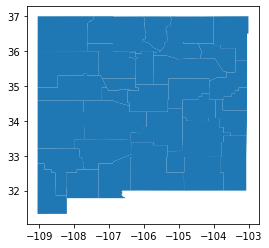

In [17]:
nm_gdf.plot()

In [18]:
nm_gdf[nm_gdf.NAME.isin(['Valencia', 'Cibola'])]

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
913,35,006,00933051,35006,Cibola,Cibola County,06,H1,G4020,None,24380,None,A,11758505180,5554603,+34.9282721,-107.9926805,"POLYGON ((-108.469694 35.133239, -108.469658 3..."
3146,35,061,00933052,35061,Valencia,Valencia County,06,H1,G4020,106,10740,None,A,2762854204,2760089,+34.7168404,-106.8065821,"POLYGON ((-107.024996 34.871018, -107.02468 34..."


In [19]:
combined = nm_gdf[nm_gdf.NAME.isin(['Valencia', 'Cibola'])].dissolve(by='STATEFP')

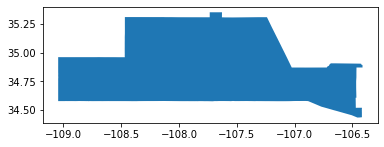

In [20]:
combined.plot()

In [21]:
combined['NAME'] = 'Cibola+Valencia'
combined['NAMELSAD'] = 'Cibola+Valencia Counties'
combined['STATEFP'] = 35

In [22]:
combined['GEOID'] =  '35061' # Valencia

In [23]:
nm0 = nm_gdf[~nm_gdf.COUNTYFP.isin(['006', '061'])]

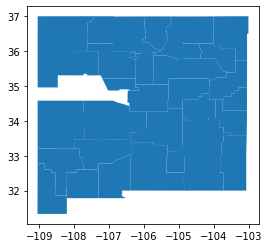

In [24]:
nm0.plot()

In [25]:
nm1 = pandas.concat([nm0, combined])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


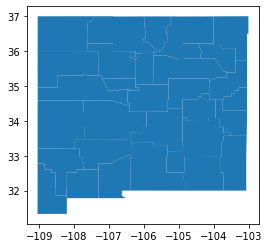

In [26]:
nm1.plot()

In [27]:
nm_gdf.shape

(33, 18)

In [28]:
nm1.shape

(32, 18)

In [29]:
csv['GeoFIPS'] = [fip.strip().replace("\"", "") for fip in csv.GeoFIPS]


In [30]:
data = csv
data['GEOID'] = data.GeoFIPS

In [31]:
merged_gdf = nm1.merge(data, on='GEOID')

In [32]:
merged_gdf.shape

(96, 76)

In [33]:
merged_gdf.head()

,ALAND,AWATER,CBSAFP,CLASSFP,COUNTYFP,COUNTYNS,CSAFP,FUNCSTAT,GEOID,INTPTLAT,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,6016819475,29089486,None,H1,011,00933054,None,A,35011,+34.3592729,...,60582,55832,65035,87470,82613,73262,78128,71494,74027,71733
1,6016819475,29089486,None,H1,011,00933054,None,A,35011,+34.3592729,...,2000,2002,2029,1996,1953,1921,1853,1868,1841,1829
2,6016819475,29089486,None,H1,011,00933054,None,A,35011,+34.3592729,...,30291,27888,32053,43823,42301,38137,42163,38273,40210,39220
3,17126456785,36943378,10460,H1,035,00929104,None,A,35035,+32.6155988,...,1731367,1825824,2005780,2086903,2084418,2032633,2083959,2117304,2174837,2224112
4,17126456785,36943378,10460,H1,035,00929104,None,A,35035,+32.6155988,...,62498,62462,64386,65432,65943,65677,64792,64178,65184,65817


In [34]:
us = geopandas.read_file('usincome.shp')

In [35]:
us1 = pandas.concat([us[us.STATEFP!='35'], merged_gdf])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [36]:
us1.shape

(9237, 79)

In [37]:
us1.head()

,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,MTFCC,NAME,NAMELSAD,Region,STATEFP,TableName,Unit,Unnamed: 0,Unnamed_ 0,geometry
0,148926,154820,164182,177909,200349,208954,232188,250796,285130,317742,...,G4020,Sauk,Sauk County,3,55,CAINC1,Thousands of dollars,NaN,9447.0,"POLYGON ((-90.191964 43.554996, -90.196759 43...."
1,38212,39021,39247,40037,40867,41030,42132,42114,42490,42491,...,G4020,Sauk,Sauk County,3,55,CAINC1,Number of persons,NaN,9448.0,"POLYGON ((-90.191964 43.554996, -90.196759 43...."
2,3897,3968,4183,4444,4902,5093,5511,5955,6711,7478,...,G4020,Sauk,Sauk County,3,55,CAINC1,Dollars,NaN,9449.0,"POLYGON ((-90.191964 43.554996, -90.196759 43...."
3,91916,100258,106854,116383,132623,143709,155120,173709,198952,221278,...,G4020,Pierce,Pierce County,3,55,CAINC1,Thousands of dollars,NaN,9420.0,"POLYGON ((-92.694542 44.68874, -92.694659 44.6..."
4,26277,26865,27818,28406,28683,28815,29272,29764,30474,30450,...,G4020,Pierce,Pierce County,3,55,CAINC1,Number of persons,NaN,9421.0,"POLYGON ((-92.694542 44.68874, -92.694659 44.6..."


In [38]:
us1.tail()

,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,MTFCC,NAME,NAMELSAD,Region,STATEFP,TableName,Unit,Unnamed: 0,Unnamed_ 0,geometry
91,7100,7215,7348,8026,7976,7843,8237,8684,8766,8493,...,G4020,Sierra,Sierra County,6,35,CAINC1,Number of persons,5635.0,NaN,"POLYGON ((-107.245639 33.477969, -107.24013 33..."
92,2543,2775,3018,3072,3304,3973,4367,4636,4969,5980,...,G4020,Sierra,Sierra County,6,35,CAINC1,Dollars,5636.0,NaN,"POLYGON ((-107.245639 33.477969, -107.24013 33..."
93,98031,104591,113757,126716,140007,160924,193911,238421,288148,346205,...,G4020,Cibola+Valencia,Cibola+Valencia Counties,6,35,CAINC1,Thousands of dollars,5562.0,NaN,"POLYGON ((-107.024996 34.871018, -107.02468 34..."
94,40100,40821,41825,42019,43186,43897,46079,48843,51623,54030,...,G4020,Cibola+Valencia,Cibola+Valencia Counties,6,35,CAINC1,Number of persons,5563.0,NaN,"POLYGON ((-107.024996 34.871018, -107.02468 34..."
95,2444,2562,2719,3015,3241,3665,4208,4881,5581,6407,...,G4020,Cibola+Valencia,Cibola+Valencia Counties,6,35,CAINC1,Dollars,5564.0,NaN,"POLYGON ((-107.024996 34.871018, -107.02468 34..."


In [39]:
9237/3

3079.0

In [40]:
merged_gdf.head()

,ALAND,AWATER,CBSAFP,CLASSFP,COUNTYFP,COUNTYNS,CSAFP,FUNCSTAT,GEOID,INTPTLAT,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,6016819475,29089486,None,H1,011,00933054,None,A,35011,+34.3592729,...,60582,55832,65035,87470,82613,73262,78128,71494,74027,71733
1,6016819475,29089486,None,H1,011,00933054,None,A,35011,+34.3592729,...,2000,2002,2029,1996,1953,1921,1853,1868,1841,1829
2,6016819475,29089486,None,H1,011,00933054,None,A,35011,+34.3592729,...,30291,27888,32053,43823,42301,38137,42163,38273,40210,39220
3,17126456785,36943378,10460,H1,035,00929104,None,A,35035,+32.6155988,...,1731367,1825824,2005780,2086903,2084418,2032633,2083959,2117304,2174837,2224112
4,17126456785,36943378,10460,H1,035,00929104,None,A,35035,+32.6155988,...,62498,62462,64386,65432,65943,65677,64792,64178,65184,65817


In [41]:
us1[us1.NAME.str.startswith('Cibo')]

,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,MTFCC,NAME,NAMELSAD,Region,STATEFP,TableName,Unit,Unnamed: 0,Unnamed_ 0,geometry
93,98031,104591,113757,126716,140007,160924,193911,238421,288148,346205,...,G4020,Cibola+Valencia,Cibola+Valencia Counties,6,35,CAINC1,Thousands of dollars,5562.0,NaN,"POLYGON ((-107.024996 34.871018, -107.02468 34..."
94,40100,40821,41825,42019,43186,43897,46079,48843,51623,54030,...,G4020,Cibola+Valencia,Cibola+Valencia Counties,6,35,CAINC1,Number of persons,5563.0,NaN,"POLYGON ((-107.024996 34.871018, -107.02468 34..."
95,2444,2562,2719,3015,3241,3665,4208,4881,5581,6407,...,G4020,Cibola+Valencia,Cibola+Valencia Counties,6,35,CAINC1,Dollars,5564.0,NaN,"POLYGON ((-107.024996 34.871018, -107.02468 34..."


##  Arizona

- combine La Paz County AZ with Yuma for 1983-2017


In [42]:
csv = pandas.read_csv('04.csv')


In [43]:
csv.head()

,Unnamed: 0,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,369,"""04000""",Arizona,6,CAINC1,1,...,Personal income (thousands of dollars),Thousands of dollars,6327071,...,223221865,211397715,215012419,225853155,236455566,242571877,257066980,270806695,280988093,296648898
1,370,"""04000""",Arizona,6,CAINC1,2,...,Population (persons) 1/,Number of persons,1737000,...,6280362,6343154,6407002,6465488,6544211,6616124,6706435,6802262,6908642,7016270
2,371,"""04000""",Arizona,6,CAINC1,3,...,Per capita personal income (dollars) 2/,Dollars,3643,...,35543,33327,33559,34932,36132,36664,38331,39811,40672,42280
3,372,"""04001""","Apache, AZ",6,CAINC1,1,...,Personal income (thousands of dollars),Thousands of dollars,80748,...,1729352,1871824,1939280,1985382,1984948,2020967,2113963,2183667,2240006,2351874
4,373,"""04001""","Apache, AZ",6,CAINC1,2,...,Population (persons) 1/,Number of persons,34200,...,69883,71008,71838,72179,72215,72292,71762,70979,71373,71606


In [44]:
csv = csv.replace('(NA)', 0)

In [45]:
csv[csv.GeoName.str.startswith('La Paz')]

,Unnamed: 0,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
21,390,"""04012""","La Paz, AZ*",6,CAINC1,1,...,Personal income (thousands of dollars),Thousands of dollars,0,...,529004,513123,516805,569046,552023,554562,558722,571915,608391,645531
22,391,"""04012""","La Paz, AZ*",6,CAINC1,2,...,Population (persons) 1/,Number of persons,0,...,20555,20514,20492,20582,20492,20479,20442,20342,20523,20601
23,392,"""04012""","La Paz, AZ*",6,CAINC1,3,...,Per capita personal income (dollars) 2/,Dollars,0,...,25736,25013,25220,27648,26938,27080,27332,28115,29644,31335


In [46]:
csv[csv.GeoName.str.startswith('Yuma')]

,Unnamed: 0,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
45,414,"""04027""","Yuma, AZ*",6,CAINC1,1,...,Personal income (thousands of dollars),Thousands of dollars,209506,...,5041311,5105829,5361748,5665534,5606527,5929784,5942092,6482641,6833428,7212166
46,415,"""04027""","Yuma, AZ*",6,CAINC1,2,...,Population (persons) 1/,Number of persons,59800,...,191202,193714,197124,202581,202105,201810,203039,203558,205463,207534
47,416,"""04027""","Yuma, AZ*",6,CAINC1,3,...,Per capita personal income (dollars) 2/,Dollars,3503,...,26366,26358,27200,27967,27741,29383,29266,31847,33259,34752


In [47]:
la_paz = csv.iloc[[21, 22, 23]]
yuma = csv.iloc[[45, 46, 47]]
combined = yuma.copy()
years = [str(y) for y in range(1969, 2018)]
la_paz[years] = la_paz[years].astype(int)
yuma[years] = yuma[years].astype(int)
combined[years] = combined[years].astype(int)

In [48]:
cindex = [ combined.columns.values.tolist().index(y) for y in years]

for c,y in zip(cindex,years):
    #print(menominee[y].dtype)
    #print(shawano[y].dtype)
    #print(combined[y].dtype)
    combined.iloc[0,c] = la_paz.iloc[0,c] + yuma.iloc[0,c]
    combined.iloc[1,c] = la_paz.iloc[1,c] + yuma.iloc[1,c]
    combined.iloc[2,c] = int(combined.iloc[0,c]*1000/ combined.iloc[1,c])

In [49]:
combined

,Unnamed: 0,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
45,414,"""04027""","Yuma, AZ*",6,CAINC1,1,...,Personal income (thousands of dollars),Thousands of dollars,209506,...,5570315,5618952,5878553,6234580,6158550,6484346,6500814,7054556,7441819,7857697
46,415,"""04027""","Yuma, AZ*",6,CAINC1,2,...,Population (persons) 1/,Number of persons,59800,...,211757,214228,217616,223163,222597,222289,223481,223900,225986,228135
47,416,"""04027""","Yuma, AZ*",6,CAINC1,3,...,Per capita personal income (dollars) 2/,Dollars,3503,...,26305,26228,27013,27937,27666,29170,29088,31507,32930,34443


In [50]:
csv = csv.drop([21, 22, 23, 45, 46, 47])
combined['GeoName'] = 'Yuma+La Paz'
combined['GeoFIPS'] = '"04027"'
combined['STATEFP'] = 4

In [51]:
combined = combined[csv.columns]

In [52]:
combined.head()

,Unnamed: 0,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
45,414,"""04027""",Yuma+La Paz,6,CAINC1,1,...,Personal income (thousands of dollars),Thousands of dollars,209506,...,5570315,5618952,5878553,6234580,6158550,6484346,6500814,7054556,7441819,7857697
46,415,"""04027""",Yuma+La Paz,6,CAINC1,2,...,Population (persons) 1/,Number of persons,59800,...,211757,214228,217616,223163,222597,222289,223481,223900,225986,228135
47,416,"""04027""",Yuma+La Paz,6,CAINC1,3,...,Per capita personal income (dollars) 2/,Dollars,3503,...,26305,26228,27013,27937,27666,29170,29088,31507,32930,34443


In [53]:
csv = pandas.concat([csv, combined])

In [54]:
csv.shape

(45, 58)

In [55]:
csv.head()

,Unnamed: 0,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,369,"""04000""",Arizona,6,CAINC1,1,...,Personal income (thousands of dollars),Thousands of dollars,6327071,...,223221865,211397715,215012419,225853155,236455566,242571877,257066980,270806695,280988093,296648898
1,370,"""04000""",Arizona,6,CAINC1,2,...,Population (persons) 1/,Number of persons,1737000,...,6280362,6343154,6407002,6465488,6544211,6616124,6706435,6802262,6908642,7016270
2,371,"""04000""",Arizona,6,CAINC1,3,...,Per capita personal income (dollars) 2/,Dollars,3643,...,35543,33327,33559,34932,36132,36664,38331,39811,40672,42280
3,372,"""04001""","Apache, AZ",6,CAINC1,1,...,Personal income (thousands of dollars),Thousands of dollars,80748,...,1729352,1871824,1939280,1985382,1984948,2020967,2113963,2183667,2240006,2351874
4,373,"""04001""","Apache, AZ",6,CAINC1,2,...,Population (persons) 1/,Number of persons,34200,...,69883,71008,71838,72179,72215,72292,71762,70979,71373,71606


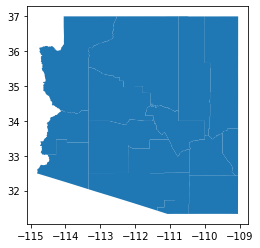

In [57]:
gdf = geopandas.read_file("zip:tl_2019_us_county.zip!tl_2019_us_county.shp")
az_gdf = gdf[gdf.STATEFP=='04']

az_gdf.plot()

In [58]:
az_gdf[az_gdf.NAME=='La Paz']

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
2389,04,012,00043540,04012,La Paz,La Paz County,06,H1,G4020,None,None,None,A,11645512187,36551630,+33.7276104,-114.0388060,"POLYGON ((-114.731222 33.304039, -114.729904 3..."


In [59]:
az_gdf[az_gdf.NAME=='Yuma']

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
398,04,027,00023901,04027,Yuma,Yuma County,06,H1,G4020,None,49740,None,A,14280777606,13248642,+32.7739424,-113.9109050,"POLYGON ((-114.763784 32.643403, -114.763419 3..."


In [60]:
combined = az_gdf[az_gdf.COUNTYFP.isin(['027', '012'])].dissolve(by='STATEFP')

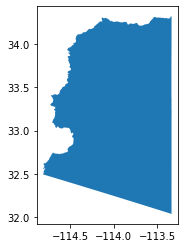

In [61]:
combined.plot()

In [62]:
combined['NAME']= "Yuma+La Paz"
combined['NAMELSAD'] = "Yuma+La Paz Counties"


In [63]:
combined.head()

,geometry,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON
STATEFP,,,,,,,,,,,,,,,,,
04,"POLYGON ((-114.763784 32.643403, -114.763419 3...",027,00023901,04027,Yuma+La Paz,Yuma+La Paz Counties,06,H1,G4020,None,49740,None,A,14280777606,13248642,+32.7739424,-113.9109050


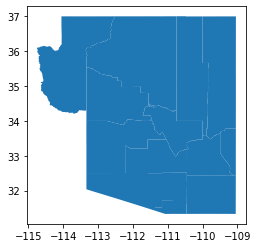

In [64]:
az0 = az_gdf[~az_gdf.COUNTYFP.isin(['027', '012'])]
az0.plot()

In [65]:
az1 = pandas.concat([az0, combined])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


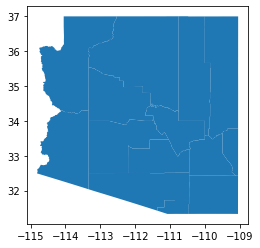

In [66]:
az1.plot()

## Merge gdf and csv

In [67]:
csv['GeoFIPS'] = [fip.strip().replace("\"", "") for fip in csv.GeoFIPS]


In [68]:
data = csv
data.head()

,Unnamed: 0,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,369,04000,Arizona,6,CAINC1,1,...,Personal income (thousands of dollars),Thousands of dollars,6327071,...,223221865,211397715,215012419,225853155,236455566,242571877,257066980,270806695,280988093,296648898
1,370,04000,Arizona,6,CAINC1,2,...,Population (persons) 1/,Number of persons,1737000,...,6280362,6343154,6407002,6465488,6544211,6616124,6706435,6802262,6908642,7016270
2,371,04000,Arizona,6,CAINC1,3,...,Per capita personal income (dollars) 2/,Dollars,3643,...,35543,33327,33559,34932,36132,36664,38331,39811,40672,42280
3,372,04001,"Apache, AZ",6,CAINC1,1,...,Personal income (thousands of dollars),Thousands of dollars,80748,...,1729352,1871824,1939280,1985382,1984948,2020967,2113963,2183667,2240006,2351874
4,373,04001,"Apache, AZ",6,CAINC1,2,...,Population (persons) 1/,Number of persons,34200,...,69883,71008,71838,72179,72215,72292,71762,70979,71373,71606


In [69]:
data['GEOID'] = data.GeoFIPS

In [70]:
merged_gdf = az1.merge(data, on='GEOID')
merged_gdf['STATEFP'] = '04'

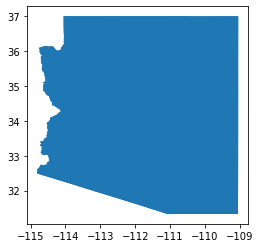

In [71]:
merged_gdf.plot()

In [72]:
us2 = pandas.concat([us1[us1.STATEFP!='04'], merged_gdf])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [73]:
us2[us2.STATEFP=='04'].shape

(42, 79)

In [74]:
us2.shape[0]/3

3078.0

## Colorado

- combine Broomfield County with Boulder CO all years (<2002 Boulder, >2002 Boulder+Broomfield)


In [75]:
csv = pandas.read_csv('08.csv')

In [76]:
csv.head()

,Unnamed: 0,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,822,"""08000""",Colorado,7,CAINC1,1,...,Personal income (thousands of dollars),Thousands of dollars,8438834,...,207772729,198147196,204691900,222571956,236687388,248958974,271101038,284142915,289620855,306411131
1,823,"""08000""",Colorado,7,CAINC1,2,...,Population (persons) 1/,Number of persons,2166000,...,4889730,4972195,5048029,5116411,5186330,5262556,5342311,5440445,5530105,5607154
2,824,"""08000""",Colorado,7,CAINC1,3,...,Per capita personal income (dollars) 2/,Dollars,3896,...,42492,39851,40549,43502,45637,47308,50746,52228,52372,54646
3,825,"""08001""","Adams, CO*",7,CAINC1,1,...,Personal income (thousands of dollars),Thousands of dollars,648153,...,13471588,13410531,13630218,14634652,15609561,16355498,17657959,18834014,19705966,20738261
4,826,"""08001""","Adams, CO*",7,CAINC1,2,...,Population (persons) 1/,Number of persons,182656,...,424913,435700,443672,451443,459861,469377,479488,489822,497395,503167


In [77]:
csv[csv.GeoName.str.startswith('Boulder')]

,Unnamed: 0,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
21,843,"""08013""","Boulder, CO*",7,CAINC1,1,...,Personal income (thousands of dollars),Thousands of dollars,538596,...,15060376,13696406,14815455,15632452,16700010,17505391,18896217,20412704,20924309,21939604
22,844,"""08013""","Boulder, CO*",7,CAINC1,2,...,Population (persons) 1/,Number of persons,129577,...,290859,293190,295930,300518,305028,309749,312505,317968,321173,322514
23,845,"""08013""","Boulder, CO*",7,CAINC1,3,...,Per capita personal income (dollars) 2/,Dollars,4157,...,51779,46715,50064,52018,54749,56515,60467,64197,65150,68027


In [78]:
csv[csv.GeoName.str.startswith('Broom')]

,Unnamed: 0,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
24,846,"""08014""","Broomfield, CO*",7,CAINC1,1,...,Personal income (thousands of dollars),Thousands of dollars,(NA),...,3333874,3130831,3035162,3230126,3441624,3306656,3557938,3804195,4011545,4346242
25,847,"""08014""","Broomfield, CO*",7,CAINC1,2,...,Population (persons) 1/,Number of persons,(NA),...,53181,54789,56214,57445,58899,60065,61706,64796,66509,68341
26,848,"""08014""","Broomfield, CO*",7,CAINC1,3,...,Per capita personal income (dollars) 2/,Dollars,(NA),...,62689,57143,53993,56230,58433,55051,57660,58710,60316,63596


In [79]:
csv = csv.replace('(NA)', 0)
boulder = csv.iloc[[21, 22, 23]]
broomfield = csv.iloc[[24, 25, 26]]
combined = boulder.copy()
years = [str(y) for y in range(1989, 2018)]
boulder[years] = boulder[years].astype(int)
broomfield[years] = broomfield[years].astype(int)
combined[years] = combined[years].astype(int)

In [80]:
cindex = [ combined.columns.values.tolist().index(y) for y in years]

for c,y in zip(cindex,years):
    #print(menominee[y].dtype)
    #print(shawano[y].dtype)
    #print(combined[y].dtype)
    combined.iloc[0,c] = boulder.iloc[0,c] + broomfield.iloc[0,c]
    combined.iloc[1,c] = boulder.iloc[1,c] + broomfield.iloc[1,c]
    combined.iloc[2,c] = int(combined.iloc[0,c]*1000/ combined.iloc[1,c])
    

In [81]:
csv = csv.drop([21, 22, 23, 24, 25, 26])
years = [str(y) for y in range(1969, 2018)]
csv[years] = csv[years].astype(int)

In [82]:
combined['GeoName'] = 'Boulder+Broomfield'
combined['GeoFIPS'] = '"08013"'

In [83]:
combined = combined[csv.columns]

csv = pandas.concat([csv, combined])

In [84]:
csv.head()

,Unnamed: 0,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,822,"""08000""",Colorado,7,CAINC1,1,...,Personal income (thousands of dollars),Thousands of dollars,8438834,...,207772729,198147196,204691900,222571956,236687388,248958974,271101038,284142915,289620855,306411131
1,823,"""08000""",Colorado,7,CAINC1,2,...,Population (persons) 1/,Number of persons,2166000,...,4889730,4972195,5048029,5116411,5186330,5262556,5342311,5440445,5530105,5607154
2,824,"""08000""",Colorado,7,CAINC1,3,...,Per capita personal income (dollars) 2/,Dollars,3896,...,42492,39851,40549,43502,45637,47308,50746,52228,52372,54646
3,825,"""08001""","Adams, CO*",7,CAINC1,1,...,Personal income (thousands of dollars),Thousands of dollars,648153,...,13471588,13410531,13630218,14634652,15609561,16355498,17657959,18834014,19705966,20738261
4,826,"""08001""","Adams, CO*",7,CAINC1,2,...,Population (persons) 1/,Number of persons,182656,...,424913,435700,443672,451443,459861,469377,479488,489822,497395,503167


In [85]:
csv.tail()

,Unnamed: 0,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
193,1015,"""08125""","Yuma, CO",7,CAINC1,2,...,Population (persons) 1/,Number of persons,8619,...,9843,10022,10052,10098,10076,10112,10175,10064,10118,10075
194,1016,"""08125""","Yuma, CO",7,CAINC1,3,...,Per capita personal income (dollars) 2/,Dollars,3691,...,40339,33800,39139,44955,50129,50286,52608,54543,52271,55197
21,843,"""08013""",Boulder+Broomfield,7,CAINC1,1,...,Personal income (thousands of dollars),Thousands of dollars,538596,...,18394250,16827237,17850617,18862578,20141634,20812047,22454155,24216899,24935854,26285846
22,844,"""08013""",Boulder+Broomfield,7,CAINC1,2,...,Population (persons) 1/,Number of persons,129577,...,344040,347979,352144,357963,363927,369814,374211,382764,387682,390855
23,845,"""08013""",Boulder+Broomfield,7,CAINC1,3,...,Per capita personal income (dollars) 2/,Dollars,4157,...,53465,48357,50691,52694,55345,56277,60003,63268,64320,67252


In [86]:
csv[csv.GeoName.str.startswith('Bould')]

,Unnamed: 0,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
21,843,"""08013""",Boulder+Broomfield,7,CAINC1,1,...,Personal income (thousands of dollars),Thousands of dollars,538596,...,18394250,16827237,17850617,18862578,20141634,20812047,22454155,24216899,24935854,26285846
22,844,"""08013""",Boulder+Broomfield,7,CAINC1,2,...,Population (persons) 1/,Number of persons,129577,...,344040,347979,352144,357963,363927,369814,374211,382764,387682,390855
23,845,"""08013""",Boulder+Broomfield,7,CAINC1,3,...,Per capita personal income (dollars) 2/,Dollars,4157,...,53465,48357,50691,52694,55345,56277,60003,63268,64320,67252


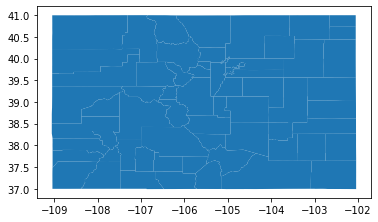

In [88]:
gdf = geopandas.read_file("zip:tl_2019_us_county.zip!tl_2019_us_county.shp")

co_gdf = gdf[gdf.STATEFP=='08']

co_gdf.plot()

In [89]:
co_gdf[co_gdf.NAME=='Boulder']

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
617,08,013,00198122,08013,Boulder,Boulder County,06,H1,G4020,216,14500,None,A,1881309466,36493405,+40.0949699,-105.3976911,"(POLYGON ((-105.648578 40.06198, -105.648054 4..."


In [90]:
co_gdf[co_gdf.NAME=='Broomfield']

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
693,08,014,01945881,08014,Broomfield,Broomfield County,06,H6,G4020,216,19740,None,C,85478765,1411396,+39.9535933,-105.0507868,"(POLYGON ((-105.166056 39.901768, -105.166034 ..."


In [91]:
combined = co_gdf[co_gdf.COUNTYFP.isin(['013', '014'])].dissolve(by='STATEFP')

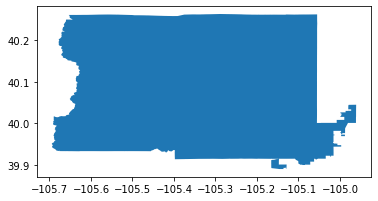

In [92]:
combined.plot()

In [93]:
combined.head()

,geometry,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON
STATEFP,,,,,,,,,,,,,,,,,
08,"POLYGON ((-105.166056 39.901768, -105.166034 3...",013,00198122,08013,Boulder,Boulder County,06,H1,G4020,216,14500,None,A,1881309466,36493405,+40.0949699,-105.3976911


In [94]:
combined['NAME'] = "Boulder+Bloomfield"
combined['NAMELSAD'] = "Boulder+Bloomfield Counties"


In [95]:
combined['GEOID'] = '08013'

In [96]:
combined.columns

Index(['geometry', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAME', 'NAMELSAD', 'LSAD',
       'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP', 'FUNCSTAT', 'ALAND',
       'AWATER', 'INTPTLAT', 'INTPTLON'],
      dtype='object')

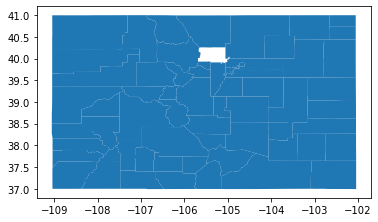

In [97]:
co0 = co_gdf[~co_gdf.COUNTYFP.isin(['013', '014'])]
co0.plot()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


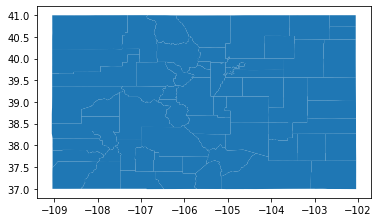

In [98]:
co1 = pandas.concat([co0, combined])
co1.plot()

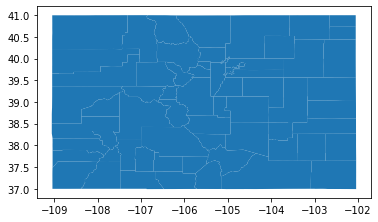

In [99]:
co_gdf.plot()

In [100]:
co1.shape

(63, 18)

In [101]:
co_gdf.shape

(64, 18)

In [102]:
csv['GeoFIPS'] = [fip.strip().replace("\"", "") for fip in csv.GeoFIPS]


In [103]:
data = csv
data['GEOID'] = data.GeoFIPS

In [104]:
merged = co1.merge(data, on='GEOID')
merged['STATEFP'] = '08'

In [105]:
merged[merged.NAME.str.startswith('Bould')]['STATEFP']

186    08
187    08
188    08
Name: STATEFP, dtype: object

In [106]:
co1.shape

(63, 18)

In [107]:
merged.shape

(189, 76)

In [108]:
data.shape

(192, 59)

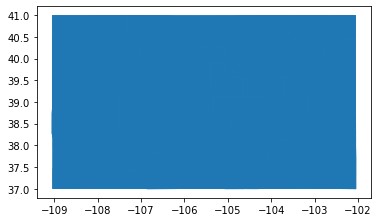

In [109]:
merged.plot()

In [110]:
merged.head()

,ALAND,AWATER,CBSAFP,CLASSFP,COUNTYFP,COUNTYNS,CSAFP,FUNCSTAT,GEOID,INTPTLAT,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,8206547705,4454510,None,H1,109,00198170,None,A,08109,+38.0316514,...,156564,152865,155801,173600,165653,164698,173175,195695,194028,199669
1,8206547705,4454510,None,H1,109,00198170,None,A,08109,+38.0316514,...,6179,6134,6136,6177,6320,6232,6186,6239,6407,6626
2,8206547705,4454510,None,H1,109,00198170,None,A,08109,+38.0316514,...,25338,24921,25391,28104,26211,26428,27995,31366,30284,30134
3,1419419016,3530746,None,H1,115,00198173,None,A,08115,+40.8715679,...,97147,88093,97610,111612,115857,120594,126242,122217,111805,122738
4,1419419016,3530746,None,H1,115,00198173,None,A,08115,+40.8715679,...,2421,2392,2368,2366,2373,2335,2329,2370,2405,2344


In [111]:
us2.head()

,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,MTFCC,NAME,NAMELSAD,Region,STATEFP,TableName,Unit,Unnamed: 0,Unnamed_ 0,geometry
0,148926,154820,164182,177909,200349,208954,232188,250796,285130,317742,...,G4020,Sauk,Sauk County,3,55,CAINC1,Thousands of dollars,NaN,9447.0,"POLYGON ((-90.191964 43.554996, -90.196759 43...."
1,38212,39021,39247,40037,40867,41030,42132,42114,42490,42491,...,G4020,Sauk,Sauk County,3,55,CAINC1,Number of persons,NaN,9448.0,"POLYGON ((-90.191964 43.554996, -90.196759 43...."
2,3897,3968,4183,4444,4902,5093,5511,5955,6711,7478,...,G4020,Sauk,Sauk County,3,55,CAINC1,Dollars,NaN,9449.0,"POLYGON ((-90.191964 43.554996, -90.196759 43...."
3,91916,100258,106854,116383,132623,143709,155120,173709,198952,221278,...,G4020,Pierce,Pierce County,3,55,CAINC1,Thousands of dollars,NaN,9420.0,"POLYGON ((-92.694542 44.68874, -92.694659 44.6..."
4,26277,26865,27818,28406,28683,28815,29272,29764,30474,30450,...,G4020,Pierce,Pierce County,3,55,CAINC1,Number of persons,NaN,9421.0,"POLYGON ((-92.694542 44.68874, -92.694659 44.6..."


In [112]:
us3 = pandas.concat([us2[us2.STATEFP!='08'], merged])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [113]:
us3.shape[0]/3

3077.0

In [114]:
us2.shape[0]/3

3078.0

In [115]:
us3

,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,MTFCC,NAME,NAMELSAD,Region,STATEFP,TableName,Unit,Unnamed: 0,Unnamed_ 0,geometry
0,148926,154820,164182,177909,200349,208954,232188,250796,285130,317742,...,G4020,Sauk,Sauk County,3,55,CAINC1,Thousands of dollars,NaN,9447.0,"POLYGON ((-90.191964 43.554996, -90.196759 43...."
1,38212,39021,39247,40037,40867,41030,42132,42114,42490,42491,...,G4020,Sauk,Sauk County,3,55,CAINC1,Number of persons,NaN,9448.0,"POLYGON ((-90.191964 43.554996, -90.196759 43...."
2,3897,3968,4183,4444,4902,5093,5511,5955,6711,7478,...,G4020,Sauk,Sauk County,3,55,CAINC1,Dollars,NaN,9449.0,"POLYGON ((-90.191964 43.554996, -90.196759 43...."
3,91916,100258,106854,116383,132623,143709,155120,173709,198952,221278,...,G4020,Pierce,Pierce County,3,55,CAINC1,Thousands of dollars,NaN,9420.0,"POLYGON ((-92.694542 44.68874, -92.694659 44.6..."
4,26277,26865,27818,28406,28683,28815,29272,29764,30474,30450,...,G4020,Pierce,Pierce County,3,55,CAINC1,Number of persons,NaN,9421.0,"POLYGON ((-92.694542 44.68874, -92.694659 44.6..."
5,3498,3732,3841,4097,4624,4987,5299,5836,6529,7267,...,G4020,Pierce,Pierce County,3,55,CAINC1,Dollars,NaN,9422.0,"POLYGON ((-92.694542 44.68874, -92.694659 44.6..."
6,267421,290823,315876,342865,383616,428009,475239,537131,601946,674440,...,G4020,La Crosse,La Crosse County,3,55,CAINC1,Thousands of dollars,NaN,9372.0,"POLYGON ((-91.347741 43.911964, -91.348743 43...."
7,80177,80703,81622,81292,82142,83788,86268,85010,87576,90617,...,G4020,La Crosse,La Crosse County,3,55,CAINC1,Number of persons,NaN,9373.0,"POLYGON ((-91.347741 43.911964, -91.348743 43...."
8,3335,3604,3870,4218,4670,5108,5509,6318,6873,7443,...,G4020,La Crosse,La Crosse County,3,55,CAINC1,Dollars,NaN,9374.0,"POLYGON ((-91.347741 43.911964, -91.348743 43...."
9,79132,86084,97567,106521,121782,131463,147760,162375,186737,205193,...,G4020,Dunn,Dunn County,3,55,CAINC1,Thousands of dollars,NaN,9327.0,"POLYGON ((-92.135379 44.944807, -92.135378 44...."


In [116]:
us3[us3.STATEFP=='08'].tail()

,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,MTFCC,NAME,NAMELSAD,Region,STATEFP,TableName,Unit,Unnamed: 0,Unnamed_ 0,geometry
184,4037,4227,4791,5753,6159,6180,6503,6536,6608,6894,...,G4020,Grand,Grand County,7,08,CAINC1,Number of persons,901.0,NaN,"POLYGON ((-106.08984 40.350062, -106.08932 40...."
185,3302,3339,3682,3783,4535,4625,6297,7201,7127,8023,...,G4020,Grand,Grand County,7,08,CAINC1,Dollars,902.0,NaN,"POLYGON ((-106.08984 40.350062, -106.08932 40...."
186,538596,600343,680907,768819,864808,979831,1109846,1245164,1434420,1683852,...,G4020,Boulder+Bloomfield,Boulder+Bloomfield Counties,7,08,CAINC1,Thousands of dollars,843.0,NaN,"POLYGON ((-105.166056 39.901768, -105.166034 3..."
187,129577,133342,140808,151309,159509,166449,166670,169117,178121,183432,...,G4020,Boulder+Bloomfield,Boulder+Bloomfield Counties,7,08,CAINC1,Number of persons,844.0,NaN,"POLYGON ((-105.166056 39.901768, -105.166034 3..."
188,4157,4502,4836,5081,5422,5887,6659,7363,8053,9180,...,G4020,Boulder+Bloomfield,Boulder+Bloomfield Counties,7,08,CAINC1,Dollars,845.0,NaN,"POLYGON ((-105.166056 39.901768, -105.166034 3..."


In [117]:
us3[us3.NAME.str.startswith('Boulder')]

,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,MTFCC,NAME,NAMELSAD,Region,STATEFP,TableName,Unit,Unnamed: 0,Unnamed_ 0,geometry
186,538596,600343,680907,768819,864808,979831,1109846,1245164,1434420,1683852,...,G4020,Boulder+Bloomfield,Boulder+Bloomfield Counties,7,08,CAINC1,Thousands of dollars,843.0,NaN,"POLYGON ((-105.166056 39.901768, -105.166034 3..."
187,129577,133342,140808,151309,159509,166449,166670,169117,178121,183432,...,G4020,Boulder+Bloomfield,Boulder+Bloomfield Counties,7,08,CAINC1,Number of persons,844.0,NaN,"POLYGON ((-105.166056 39.901768, -105.166034 3..."
188,4157,4502,4836,5081,5422,5887,6659,7363,8053,9180,...,G4020,Boulder+Bloomfield,Boulder+Bloomfield Counties,7,08,CAINC1,Dollars,845.0,NaN,"POLYGON ((-105.166056 39.901768, -105.166034 3..."


In [118]:
us3.columns

Index(['1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', 'ALAND', 'AWATER', 'CBSAFP', 'CLASSFP',
       'COUNTYFP', 'COUNTYNS', 'CSAFP', 'Descriptio', 'Description',
       'FUNCSTAT', 'GEOID', 'GeoFIPS', 'GeoName', 'INTPTLAT', 'INTPTLON',
       'IndustryCl', 'IndustryClassification', 'LSAD', 'LineCode', 'METDIVFP',
       'MTFCC', 'NAME', 'NAMELSAD', 'Region', 'STATEFP', 'TableName', 'Unit',
       'Unnamed: 0', 'Unnamed_ 0', 'geometry'],
      dtype='object')

In [119]:
columns = us3.columns
print(columns)


Index(['1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', 'ALAND', 'AWATER', 'CBSAFP', 'CLASSFP',
       'COUNTYFP', 'COUNTYNS', 'CSAFP', 'Descriptio', 'Description',
       'FUNCSTAT', 'GEOID', 'GeoFIPS', 'GeoName', 'INTPTLAT', 'INTPTLON',
       'IndustryCl', 'IndustryClassification', 'LSAD', 'LineCode', 'METDIVFP',
       'MTFCC', 'NAME', 'NAMELSAD', 'Region', 'STATEFP', 'TableName', 'Unit',
       'Unnamed: 0', 'Unnamed_ 0', 'geometry'],
      dtype='object')


In [120]:
us3.shape

(9231, 79)

In [121]:
columns = us3.columns.values.tolist()
columns

['1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 'ALAND',
 'AWATER',
 'CBSAFP',
 'CLASSFP',
 'COUNTYFP',
 'COUNTYNS',
 'CSAFP',
 'Descriptio',
 'Description',
 'FUNCSTAT',
 'GEOID',
 'GeoFIPS',
 'GeoName',
 'INTPTLAT',
 'INTPTLON',
 'IndustryCl',
 'IndustryClassification',
 'LSAD',
 'LineCode',
 'METDIVFP',
 'MTFCC',
 'NAME',
 'NAMELSAD',
 'Region',
 'STATEFP',
 'TableName',
 'Unit',
 'Unnamed: 0',
 'Unnamed_ 0',
 'geometry']

In [122]:
us3.loc[:,'Unnamed: 0']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
       ...  
184    901.0
185    902.0
186    843.0
187    844.0
188    845.0
Name: Unnamed: 0, Length: 9231, dtype: float64

In [123]:
us3.shape

(9231, 79)

In [124]:
us4 = us3.drop(columns=['Unnamed: 0', 'Unnamed_ 0', 'IndustryCl'])

In [125]:
us4.shape

(9231, 76)

In [126]:
for year in range(1969, 2018):
    year = str(year)
    us4[year] = us4[year].astype('int')

In [127]:
us4.to_file('usincome_final.shp')